In [1]:
import math
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import numpy.ma as ma
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import cartopy.crs as ccrs
import cartopy.crs as crs
import cartopy.feature as cfeature
import h5py  
from astropy.time import Time
import os
import glob
from osgeo import gdal
import scipy.ndimage
import rasterio as rio
import re
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import earthpy.mask as em
from pyhdf.SD import SD, SDC
import pprint
import csv
import seaborn as sns

In [2]:
# load savnnah data
data = pd.read_csv("D:\\masters_data\\output\\csv\\Analysis\\Savannah_df.csv", header=None)

data.columns = ["OID", "latitude","longitude","H", "V", "row","col", "mean_canopy", "min_canopy", 
                "max_canopy", "median_canopy","canopy_openness", "VI", "Yearly_rainfall", "LC",
                "First_burns", "Second_burns", "Total_burns", "Tile", "BA_category", 
                "canopy_spread","Rainfall_band200", "Rainfall_band500"]

In [3]:
data

,OID,latitude,longitude,H,V,row,col,mean_canopy,min_canopy,max_canopy,...,Yearly_rainfall,LC,First_burns,Second_burns,Total_burns,Tile,BA_category,canopy_spread,Rainfall_band200,Rainfall_band500
0,1912,5.338834,19.840212,19,8,1118,2340,6.982491,1.247681,14.698914,...,1465.584180,9,1,4,5,H19V08,medmed,1.926423,1500,1200_1500
1,1913,5.404875,19.833574,19,8,1102,2338,2.933857,0.573242,8.252380,...,1465.584180,9,1,6,7,H19V08,medhigh,2.617421,1500,1200_1500
2,1914,5.405597,19.833506,19,8,1102,2338,2.819726,0.512360,7.634979,...,1465.584180,9,1,6,7,H19V08,medhigh,2.525997,1500,1200_1500
3,1915,5.406500,19.833418,19,8,1101,2338,2.423932,0.503265,7.126129,...,1465.584180,9,1,7,8,H19V08,medhigh,2.732281,1500,1200_1500
4,1916,5.407402,19.833324,19,8,1101,2338,3.226515,0.600067,9.371765,...,1465.584180,9,1,7,8,H19V08,medhigh,2.718629,1500,1200_1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277578,1205668,5.221703,26.075653,20,8,1146,1431,6.738885,0.871399,17.202576,...,1536.017786,9,0,0,0,H20V08,lowlow,2.423424,1500,above1500
277579,1205669,5.220801,26.075562,20,8,1146,1431,4.576035,0.527954,16.362366,...,1536.017786,9,0,0,0,H20V08,lowlow,3.460291,1500,above1500
277580,1205670,5.217193,26.075195,20,8,1147,1431,4.869889,0.504517,12.951599,...,1536.017786,9,1,2,3,H20V08,medmed,2.555927,1500,above1500
277581,1205671,5.216290,26.075104,20,8,1147,1431,4.489307,0.531738,8.670471,...,1536.017786,9,1,2,3,H20V08,medmed,1.812915,1500,above1500


In [4]:
data1 = data[data.mean_canopy <= 35]
data1.drop_duplicates(['Rainfall_band200','Total_burns'], inplace=True)
data1.drop_duplicates(['mean_canopy', 'Rainfall_band200'], inplace=True)

In [5]:
data1

,OID,latitude,longitude,H,V,row,col,mean_canopy,min_canopy,max_canopy,...,Yearly_rainfall,LC,First_burns,Second_burns,Total_burns,Tile,BA_category,canopy_spread,Rainfall_band200,Rainfall_band500
0,1912,5.338834,19.840212,19,8,1118,2340,6.982491,1.247681,14.698914,...,1465.584180,9,1,4,5,H19V08,medmed,1.926423,1500,1200_1500
1,1913,5.404875,19.833574,19,8,1102,2338,2.933857,0.573242,8.252380,...,1465.584180,9,1,6,7,H19V08,medhigh,2.617421,1500,1200_1500
3,1915,5.406500,19.833418,19,8,1101,2338,2.423932,0.503265,7.126129,...,1465.584180,9,1,7,8,H19V08,medhigh,2.732281,1500,1200_1500
13,1925,5.415522,19.832508,19,8,1099,2338,3.823970,0.508179,10.951843,...,1465.584180,9,1,5,6,H19V08,medmed,2.731106,1500,1200_1500
16,1928,5.418228,19.832237,19,8,1099,2337,10.728595,0.511292,25.424011,...,1465.584180,9,1,3,4,H19V08,medmed,2.322086,1500,1200_1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62828,299221,9.234717,20.581636,20,8,183,75,4.802729,0.533417,12.817749,...,997.662954,9,0,3,3,H20V08,lowmed,2.557782,900,sub1200
65050,304750,9.585689,21.489737,20,8,98,285,3.583769,0.533722,9.434265,...,939.157462,9,0,1,1,H20V08,lowmed,2.483570,900,sub1200
95158,437703,6.131412,23.655195,20,8,927,844,4.569154,0.518005,13.948059,...,1435.441425,9,9,10,19,H20V08,highigh,2.939287,1500,1200_1500
103006,465471,9.335807,22.553425,20,8,158,540,3.681472,0.632141,10.212891,...,980.057627,9,10,9,19,H20V08,highigh,2.602424,900,sub1200


Hard to see much of a trend here....
I would expect to see higher mean tree canopy associated with low burning / high rainfall - currently unconvincing
...nice figure tho

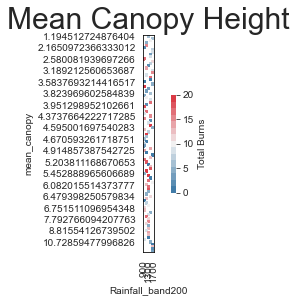

In [6]:
pivot = data1.pivot(index='mean_canopy',columns='Rainfall_band200', values='Total_burns', )
cmap = sns.diverging_palette(240, 10, n=15, sep=1)
sns.color_palette("Spectral", as_cmap=True)
sns.set_style("white")
ax = sns.heatmap(pivot, cmap=cmap, xticklabels=2, square = True,
                 cbar_kws={"shrink": 0.45, 'label': 'Total Burns'})
ax.set_title("Mean Canopy Height",fontsize=30)
plt.savefig("D:\masters_data\output\csv\Analysis\Heatmap1.png", transparent=True) 
for axes in ['top','bottom','left','right']:
    ax.spines[axes].set_visible(True)
    ax.spines[axes].set_color('black')
    ax.spines[axes].set_visible(True)
    ax.spines[axes].set_color('black')  
plt.show()

In [7]:
pivot = data.pivot(index='mean_canopy',columns='Rainfall_band200', values='Total_burns', )

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
ax = sns.heatmap(pivot, cmap=cmap, xticklabels=2, square = True,
                 cbar_kws={"shrink": 0.45, 'label': 'Total Burns'})
ax.set_title("Mean Canopy Height",fontsize=30)
plt.savefig("D:\masters_data\output\csv\Analysis\Heatmap1.png", transparent=True) 
for axes in ['top','bottom','left','right']:
    ax.spines[axes].set_visible(True)
    ax.spines[axes].set_color('black')
    ax.spines[axes].set_visible(True)
    ax.spines[axes].set_color('black')  
plt.show()

In [ ]:
data['Rainfall_band200'].unique()

In [ ]:
x = data['Rainfall_band200']
y = data['mean_canopy']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[50]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

A much cleare trend showing that burned area relates to the middle of rainfall bands? - what wed expect. Too wet above 1900mm / too little fuel below 700mm.

Not a clear trend on canopy band - lowest in middle?

In [ ]:
def rainfall_band_type(rainfall):
    if 0 <= rainfall < 200:
        band = 100
    elif 200 <= rainfall < 400:
        band = 300
    elif 400 <= rainfall < 600:
        band = 500
    elif 600 <= rainfall < 800:
        band = 700
    elif 700 <= rainfall < 1000:
        band = 900
    elif 1000 <= rainfall < 1200:
        band = 1100
    elif 1200 <= rainfall < 1400:
        band = 1300
    elif 1400 <= rainfall < 1600:
        band = 1500
    elif 1600 <= rainfall < 1800:
        band = 1700
    elif 1800 <= rainfall < 2000:
        band = 1900
    elif 2000 <= rainfall < 2200:
        band = 2100
    elif 2200 <= rainfall < 2400:
        band = 2300
    else:
        band = 2500
    return band

In [ ]:
rainfall_bands = []
number = 0 
for i in range(len(data_map2['Total_rainfall'])):
    rainfall_bands.append(rainfall_band_type(data_map2['Total_rainfall'][number]))
    number +=1

In [ ]:
print(len(rainfall_bands))
print(len(data_map2))

In [ ]:
data_map2["rainfall_band_200s"] = rainfall_bands
data_map2.drop_duplicates(['rainfall_band_200s','Total_burns'], inplace=True)
data_map2.drop_duplicates(['mean_canopy', 'rainfall_band_200s'], inplace=True)
data_map2['Total_burns'] = data_map2['Total_burns'].astype(int)

In [42]:
pivot = data1.pivot(index='Rainfall_band200', columns='Total_burns', values='mean_canopy')
sns.set(rc={'figure.figsize':(10,15)})
cmap = sns.diverging_palette(240, 10, n=15, sep=1)
sns.color_palette("Spectral", as_cmap=True)
sns.set_style("white")
ax = sns.heatmap(pivot, cmap=cmap, xticklabels=2, square = True,
                 cbar_kws={"shrink": 0.25, 'label': 'Mean Canopy Height (m)'})
ax.invert_yaxis()
ax.set_title("Mean Canopy Height",fontsize=30)
ax.set_xlabel("Burn Frequency", fontsize= 16)
ax.set_ylabel("Precipitation (mm/yr)", fontsize= 16)
plt.savefig("D:\masters_data\output\csv\Analysis\Heatmap2.png", transparent=True) 
for axes in ['top','bottom','left','right']:
    ax.spines[axes].set_visible(True)
    ax.spines[axes].set_color('black')
    ax.spines[axes].set_visible(True)
    ax.spines[axes].set_color('black')  
plt.show()

ValueError: could not convert string to float: 'H19V08'

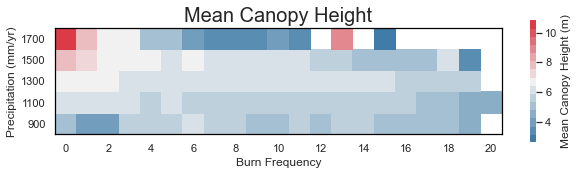

In [8]:
table = pd.pivot_table(data, values='mean_canopy', index='Rainfall_band200',
                    columns='Total_burns', aggfunc=np.mean)

# pivot = table.pivot(table, columns='Total_burns')

sns.set(rc={'figure.figsize':(10,15)})
cmap = sns.diverging_palette(240, 10, n=15, sep=1)
sns.color_palette("Spectral", as_cmap=True)
sns.set_style("white")
ax = sns.heatmap(table, cmap=cmap, xticklabels=2, square = True,
                 cbar_kws={"shrink": 0.15, 'label': 'Mean Canopy Height (m)'})
ax.invert_yaxis()
ax.set_title("Mean Canopy Height",fontsize=20)
ax.set_xlabel("Burn Frequency", fontsize= 12)
ax.set_ylabel("Precipitation (mm/yr)", fontsize= 12)
plt.savefig("D:\masters_data\output\csv\Analysis\Heatmap2.png", transparent=True) 
for axes in ['top','bottom','left','right']:
    ax.spines[axes].set_visible(True)
    ax.spines[axes].set_color('black')
    ax.spines[axes].set_visible(True)
    ax.spines[axes].set_color('black')  
plt.show()

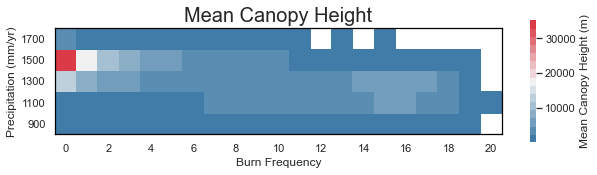

In [9]:
table = pd.pivot_table(data, values='mean_canopy', index='Rainfall_band200',
                    columns='Total_burns', aggfunc={"mean_canopy":len})

# pivot = table.pivot(table, columns='Total_burns')

sns.set(rc={'figure.figsize':(10,15)})
cmap = sns.diverging_palette(240, 10, n=15, sep=1)
sns.color_palette("Spectral", as_cmap=True)
sns.set_style("white")
ax = sns.heatmap(table, cmap=cmap, xticklabels=2, square = True,
                 cbar_kws={"shrink": 0.15, 'label': 'Mean Canopy Height (m)'})
       
ax.invert_yaxis()     
ax.set_title("Mean Canopy Height",fontsize=20)
ax.set_xlabel("Burn Frequency", fontsize= 12)
ax.set_ylabel("Precipitation (mm/yr)", fontsize= 12)
plt.savefig("D:\masters_data\output\csv\Analysis\Heatmap2.png", transparent=True) 
for axes in ['top','bottom','left','right']:
    ax.spines[axes].set_visible(True)
    ax.spines[axes].set_color('black')
    ax.spines[axes].set_visible(True)
    ax.spines[axes].set_color('black') 

plt.show()

In [10]:
table

Total_burns,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Rainfall_band200,,,,,,,,,,,,,,,,,,,,,
900,28.0,7.0,16.0,42.0,26.0,42.0,51.0,48.0,61.0,56.0,...,64.0,76.0,113.0,120.0,109.0,137.0,129.0,126.0,46.0,NaN
1100,739.0,922.0,1084.0,1282.0,1455.0,1865.0,2313.0,3230.0,3551.0,4464.0,...,4097.0,3288.0,3762.0,4268.0,4840.0,4759.0,4521.0,2686.0,185.0,20.0
1300,13716.0,8933.0,6711.0,5041.0,4171.0,3926.0,3684.0,3516.0,4019.0,4248.0,...,3894.0,3892.0,4348.0,4958.0,5910.0,6062.0,5859.0,4063.0,275.0,NaN
1500,35287.0,18003.0,10820.0,7715.0,6240.0,4909.0,4679.0,3997.0,3201.0,2972.0,...,1443.0,1288.0,1343.0,1488.0,1576.0,1564.0,1130.0,520.0,65.0,NaN
1700,3952.0,752.0,367.0,154.0,119.0,76.0,62.0,34.0,50.0,28.0,...,4.0,NaN,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN


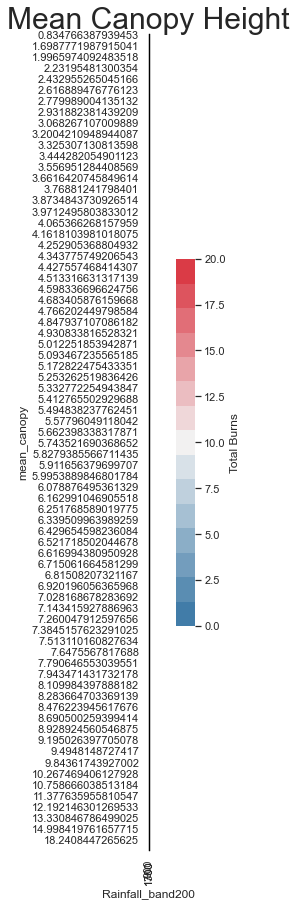

In [91]:
table1 = pd.pivot_table(data, values='Total_burns', index='mean_canopy',
                    columns='Rainfall_band200', aggfunc=np.mean)

ax = sns.heatmap(table1, cmap=cmap, xticklabels=2, square = True,
                 cbar_kws={"shrink": 0.45, 'label': 'Total Burns'})
ax.set_title("Mean Canopy Height",fontsize=30)
plt.savefig("D:\masters_data\output\csv\Analysis\Heatmap1.png", transparent=True) 
for axes in ['top','bottom','left','right']:
    ax.spines[axes].set_visible(True)
    ax.spines[axes].set_color('black')
    ax.spines[axes].set_visible(True)
    ax.spines[axes].set_color('black')  
plt.show()